# Date - 17/10/2023 

# Team ID - 721

# Project Title - Customer Churn Prediction

## 1.Import Libraries required to create the Customer Churn Model

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Load Churn Prediction Dataset

In [2]:
data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

## 3.Exploring Dataset

### 1. Displaying the top 5 rows

In [3]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### 2. Displaying the bottom 5 rows

In [4]:
data.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


### 3. Displaying the colomns

In [5]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

### 4. Finding the shape

In [6]:
data.shape

(7043, 21)

## 4.Data Visualization

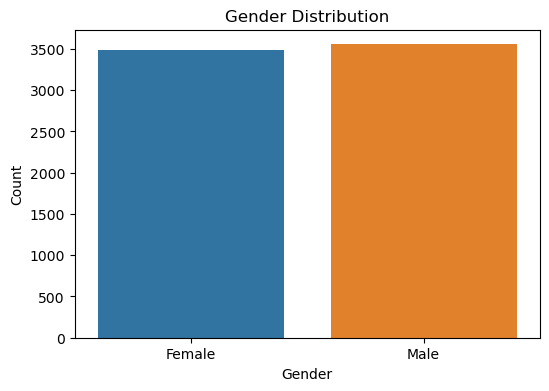

In [7]:
plt.figure(figsize=(6, 4))
sns.countplot(data=data, x='gender')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


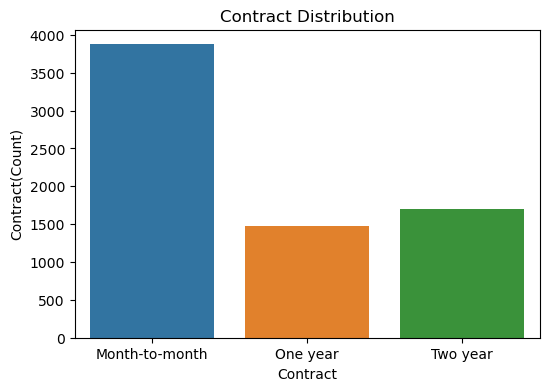

In [8]:
plt.figure(figsize=(6, 4))
sns.countplot(data=data, x='Contract')
plt.title('Contract Distribution')
plt.xlabel('Contract')
plt.ylabel('Contract(Count)')
plt.show()


In [9]:
# Count the number of customers for each churn category
churn_counts = data['Churn'].value_counts()

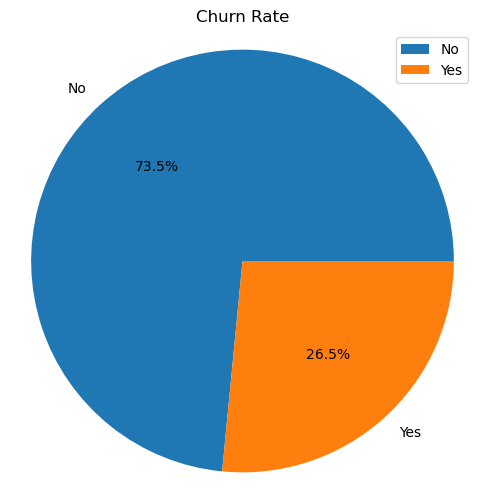

In [10]:
# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%')
plt.title('Churn Rate')
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is circular.
plt.legend()
plt.show()

## 5.Preprocess Dataset

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [12]:
missing_values = data.isnull().sum()

In [13]:
print("Missing Values:\n", missing_values)

Missing Values:
 customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [14]:
data = data.dropna()

In [15]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [16]:
df = data.drop('customerID',axis=1)

In [17]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [18]:
#count of string value into the column.
count=0
for i in df.TotalCharges:
    if i==' ':
        count+=1
print('count of empty string:- ',count)
#we will replace this empty string to nan values
df['TotalCharges'] = df['TotalCharges'].replace(" ",np.nan)
# typecasting of the TotalCharges column
df['TotalCharges'] = df['TotalCharges'].astype(float)

count of empty string:-  11


## 6. Checking Null Values in Customer Churn Data


In [19]:
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [20]:
# fill null values with mean
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].mean())

In [21]:
#numerical variables

num = list(df.select_dtypes(include=['int64','float64']).keys())

#categorical variables

cat = list(df.select_dtypes(include='O').keys())

print(cat)

print(num)

['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']
['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']


In [22]:
# value_counts of the categorical columns
for i in cat:
    print(df[i].value_counts())
# as we see that there is extra categories which we have to convert it into No.
df.MultipleLines = df.MultipleLines.replace('No phone service','No')
df.OnlineSecurity = df.OnlineSecurity.replace('No internet service','No')
df.OnlineBackup = df.OnlineBackup.replace('No internet service','No')
df.DeviceProtection = df.DeviceProtection.replace('No internet service','No')
df.TechSupport = df.TechSupport.replace('No internet service','No')
df.StreamingTV = df.StreamingTV.replace('No internet service','No')
df.StreamingMovies = df.StreamingMovies.replace('No internet service','No')

gender
Male      3555
Female    3488
Name: count, dtype: int64
Partner
No     3641
Yes    3402
Name: count, dtype: int64
Dependents
No     4933
Yes    2110
Name: count, dtype: int64
PhoneService
Yes    6361
No      682
Name: count, dtype: int64
MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64
InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64
OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64
OnlineBackup
No                     3088
Yes                    2429
No internet service    1526
Name: count, dtype: int64
DeviceProtection
No                     3095
Yes                    2422
No internet service    1526
Name: count, dtype: int64
TechSupport
No                     3473
Yes                    2044
No internet service    1526
Name: count, dtype: int64
StreamingTV
No                     2810
Y

## 7.Handling categorical Variables in Customer Churn Data

In [23]:
# we have to handel this all categorical variables
# there are mainly Yes/No features in most of the columns
# we will convert Yes = 1 and No = 0
for i in cat:
    df[i] = df[i].replace('Yes',1)
    df[i] = df[i].replace('No',0)

In [24]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,Male,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,Male,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,Male,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,1,1,24,1,1,DSL,1,0,1,1,1,1,One year,1,Mailed check,84.80,1990.50,0
7039,Female,0,1,1,72,1,1,Fiber optic,0,1,1,0,1,1,One year,1,Credit card (automatic),103.20,7362.90,0
7040,Female,0,1,1,11,0,0,DSL,1,0,0,0,0,0,Month-to-month,1,Electronic check,29.60,346.45,0
7041,Male,1,1,0,4,1,1,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Mailed check,74.40,306.60,1


In [25]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()
#from sklearn.preprocessing import OrdinalEncoder

# Convert all values in 'InternetService' to strings
df['InternetService'] = df['InternetService'].astype(str)

# Create and fit the OrdinalEncoder
oe = OrdinalEncoder()
df['InternetService'] = oe.fit_transform(df[['InternetService']])

df['Contract'] = oe.fit_transform(df[['Contract']])
df['PaymentMethod'] = oe.fit_transform(df[['PaymentMethod']])
# df['Gender'] = oe.fit_transform(df['Gender'])
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['gender'] = label_encoder.fit_transform(df['gender'])
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,0,1.0,0,1,0,0,0,0,0.0,1,2.0,29.85,29.85,0
1,1,0,0,0,34,1,0,1.0,1,0,1,0,0,0,1.0,0,3.0,56.95,1889.50,0
2,1,0,0,0,2,1,0,1.0,1,1,0,0,0,0,0.0,1,3.0,53.85,108.15,1
3,1,0,0,0,45,0,0,1.0,1,0,1,1,0,0,1.0,0,0.0,42.30,1840.75,0
4,0,0,0,0,2,1,0,2.0,0,0,0,0,0,0,0.0,1,2.0,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,1,1.0,1,0,1,1,1,1,1.0,1,3.0,84.80,1990.50,0
7039,0,0,1,1,72,1,1,2.0,0,1,1,0,1,1,1.0,1,1.0,103.20,7362.90,0
7040,0,0,1,1,11,0,0,1.0,1,0,0,0,0,0,0.0,1,2.0,29.60,346.45,0
7041,1,1,1,0,4,1,1,2.0,0,0,0,0,0,0,0.0,1,3.0,74.40,306.60,1


In [26]:
scale_cols = ['tenure','MonthlyCharges','TotalCharges']
# now we scling all the data 
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
df[scale_cols] = scale.fit_transform(df[scale_cols])
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,0.013889,0,0,1.0,0,1,0,0,0,0,0.0,1,2.0,0.115423,0.001275,0
1,1,0,0,0,0.472222,1,0,1.0,1,0,1,0,0,0,1.0,0,3.0,0.385075,0.215867,0
2,1,0,0,0,0.027778,1,0,1.0,1,1,0,0,0,0,0.0,1,3.0,0.354229,0.010310,1
3,1,0,0,0,0.625000,0,0,1.0,1,0,1,1,0,0,1.0,0,0.0,0.239303,0.210241,0
4,0,0,0,0,0.027778,1,0,2.0,0,0,0,0,0,0,0.0,1,2.0,0.521891,0.015330,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,0.333333,1,1,1.0,1,0,1,1,1,1,1.0,1,3.0,0.662189,0.227521,0
7039,0,0,1,1,1.000000,1,1,2.0,0,1,1,0,1,1,1.0,1,1.0,0.845274,0.847461,0
7040,0,0,1,1,0.152778,0,0,1.0,1,0,0,0,0,0,0.0,1,2.0,0.112935,0.037809,0
7041,1,1,1,0,0.055556,1,1,2.0,0,0,0,0,0,0,0.0,1,3.0,0.558706,0.033210,1


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int32  
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int64  
 3   Dependents        7043 non-null   int64  
 4   tenure            7043 non-null   float64
 5   PhoneService      7043 non-null   int64  
 6   MultipleLines     7043 non-null   int64  
 7   InternetService   7043 non-null   float64
 8   OnlineSecurity    7043 non-null   int64  
 9   OnlineBackup      7043 non-null   int64  
 10  DeviceProtection  7043 non-null   int64  
 11  TechSupport       7043 non-null   int64  
 12  StreamingTV       7043 non-null   int64  
 13  StreamingMovies   7043 non-null   int64  
 14  Contract          7043 non-null   float64
 15  PaperlessBilling  7043 non-null   int64  
 16  PaymentMethod     7043 non-null   float64


## Independent and Dependent variables

In [28]:
# independent and dependent variables
x = df.drop('Churn',axis=1)
y = df['Churn']

## Splitting data

In [29]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=10)
print(xtrain.shape)
print(xtest.shape)

(5634, 19)
(1409, 19)


## Building Neural Network for Customer Churn Data

### now we create our artificial neural net.

In [30]:
# import tensorflow
import tensorflow as tf
#import keras 
from tensorflow import keras

## Define Model

In [31]:
# define se`quential model
model = keras.Sequential([
    # input layer
    keras.layers.Dense(19, input_shape=(19,), activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(10,activation = 'relu'),
    # we use sigmoid for binary output
    # output layer
    keras.layers.Dense(1, activation='sigmoid')
]
)

In [32]:
# xtrain = np.array(xtrain, dtype=np.float32)  # Example: Convert xtrain to float32
# ytrain = np.array(ytrain, dtype=np.float32)  # Example: Convert ytrain to float32


## Compile the Customer Churn Model

In [33]:
# time for compilation of neural net.
model.compile(optimizer = 'adam',
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])
# now we fit our model to training data
model.fit(xtrain,ytrain,epochs=100)

Epoch 1/100
177/177 [==============================] - 3s 4ms/step - loss: 0.5090 - accuracy: 0.7428
Epoch 2/100
177/177 [==============================] - 1s 3ms/step - loss: 0.4403 - accuracy: 0.7836
Epoch 3/100
177/177 [==============================] - 1s 3ms/step - loss: 0.4340 - accuracy: 0.7943
Epoch 4/100
177/177 [==============================] - 1s 3ms/step - loss: 0.4296 - accuracy: 0.7962
Epoch 5/100
177/177 [==============================] - 1s 4ms/step - loss: 0.4287 - accuracy: 0.7962
Epoch 6/100
177/177 [==============================] - 1s 3ms/step - loss: 0.4251 - accuracy: 0.8016
Epoch 7/100
177/177 [==============================] - 1s 3ms/step - loss: 0.4240 - accuracy: 0.7985
Epoch 8/100
177/177 [==============================] - 1s 3ms/step - loss: 0.4233 - accuracy: 0.8012
Epoch 9/100
177/177 [==============================] - 1s 3ms/step - loss: 0.4199 - accuracy: 0.8055
Epoch 10/100
177/177 [==============================] - 1s 3ms/step - loss: 0.4198 - accura

### evalute the model

In [34]:
model.evaluate(xtest,ytest)

45/45 [==============================] - 1s 3ms/step - loss: 0.4320 - accuracy: 0.7800


[0.4320320785045624, 0.779985785484314]

### predict the churn values

In [35]:
# predict the churn values
ypred = model.predict(xtest)
print(ypred)
# unscaling the ypred values 
ypred_lis = []
for i in ypred:
    if i>0.5:
        ypred_lis.append(1)
    else:
        ypred_lis.append(0)
print(ypred_lis)


45/45 [==============================] - 0s 5ms/step
[[0.30121344]
 [0.96312666]
 [0.22262603]
 ...
 [0.2961771 ]
 [0.11197827]
 [0.9920137 ]]
[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0

In [36]:
#make dataframe for comparing the orignal and predict values
data = {'orignal_churn':ytest, 'predicted_churn':ypred_lis}
df_check = pd.DataFrame(data)
df_check.head(10)

,orignal_churn,predicted_churn
6418,0,0
1948,1,1
4497,0,0
66,0,0
1705,0,0
924,0,0
1051,0,0
7012,0,0
3723,0,0
4590,0,0


## Performance Matrices


In [37]:
# checking for performance metrices
#importing classification_report and confusion metrics
from sklearn.metrics import confusion_matrix, classification_report
#print classification_report
print(classification_report(ytest,ypred_lis))


              precision    recall  f1-score   support

           0       0.85      0.86      0.86      1066
           1       0.55      0.53      0.54       343

    accuracy                           0.78      1409
   macro avg       0.70      0.70      0.70      1409
weighted avg       0.78      0.78      0.78      1409



Text(183.22222222222223, 0.5, 'True_number')

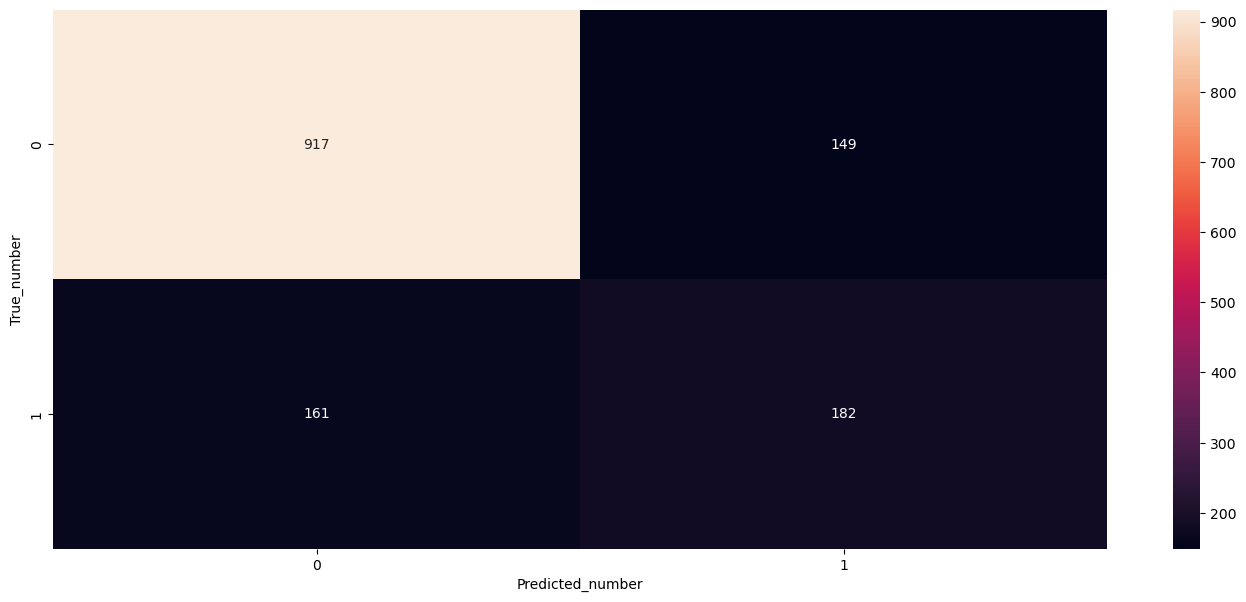

In [38]:
# ploting the confusion metrix plot
conf_mat = confusion_matrix(ytest, ypred_lis)
# conf_mat = df.confusion_matrix(labels=ytest,predictions=ypred_lis)
plt.figure(figsize = (17,7))
sns.heatmap(conf_mat, annot=True,fmt='d')
plt.xlabel('Predicted_number')
plt.ylabel('True_number')

### Independent and Dependent

In [39]:
x=df.drop(columns=['Churn'],axis=1)
y=df['Churn']

In [40]:
y.value_counts()# imbalance

Churn
0    5174
1    1869
Name: count, dtype: int64

In [41]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=44)

print(f"the shape of x_train is : {x_train.shape}")
print(f'the shape of x_test is : {x_test.shape}')
print(f'the shape of y_tain is : {y_train.shape}')
print(f'the shape of y_test is {y_test.shape}')

the shape of x_train is : (5282, 19)
the shape of x_test is : (1761, 19)
the shape of y_tain is : (5282,)
the shape of y_test is (1761,)


## Decision Tree Classifier

In [42]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(criterion="entropy", max_depth = 4)
model2=dt.fit(x_train,y_train)


In [43]:
y_pred=model2.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1298
           1       0.63      0.45      0.52       463

    accuracy                           0.78      1761
   macro avg       0.72      0.68      0.69      1761
weighted avg       0.77      0.78      0.77      1761



Text(183.22222222222223, 0.5, 'True_number')

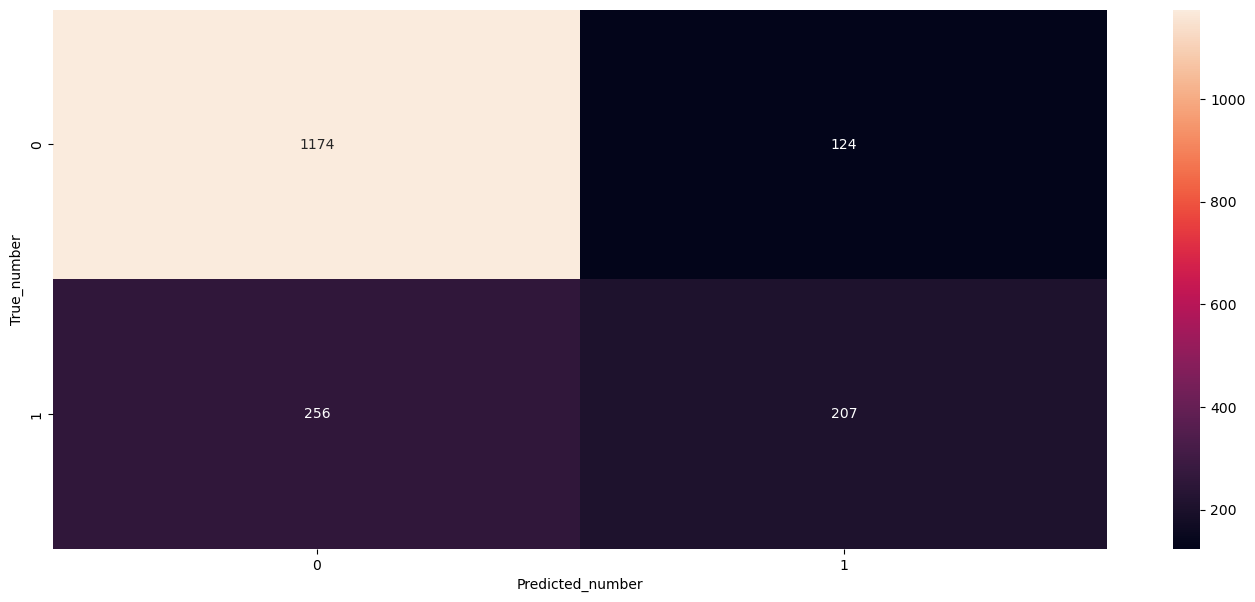

In [44]:
# ploting the confusion metrix plot
conf_mat = confusion_matrix(y_test, y_pred)
# conf_mat = df.confusion_matrix(labels=ytest,predictions=ypred_lis)
plt.figure(figsize = (17,7))
sns.heatmap(conf_mat, annot=True,fmt='d')
plt.xlabel('Predicted_number')
plt.ylabel('True_number')

## Logistics Regression

In [45]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
model3=lr.fit(x_train,y_train)

In [46]:
y_pred=model3.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1298
           1       0.65      0.53      0.58       463

    accuracy                           0.80      1761
   macro avg       0.74      0.71      0.72      1761
weighted avg       0.79      0.80      0.79      1761



Text(183.22222222222223, 0.5, 'True_number')

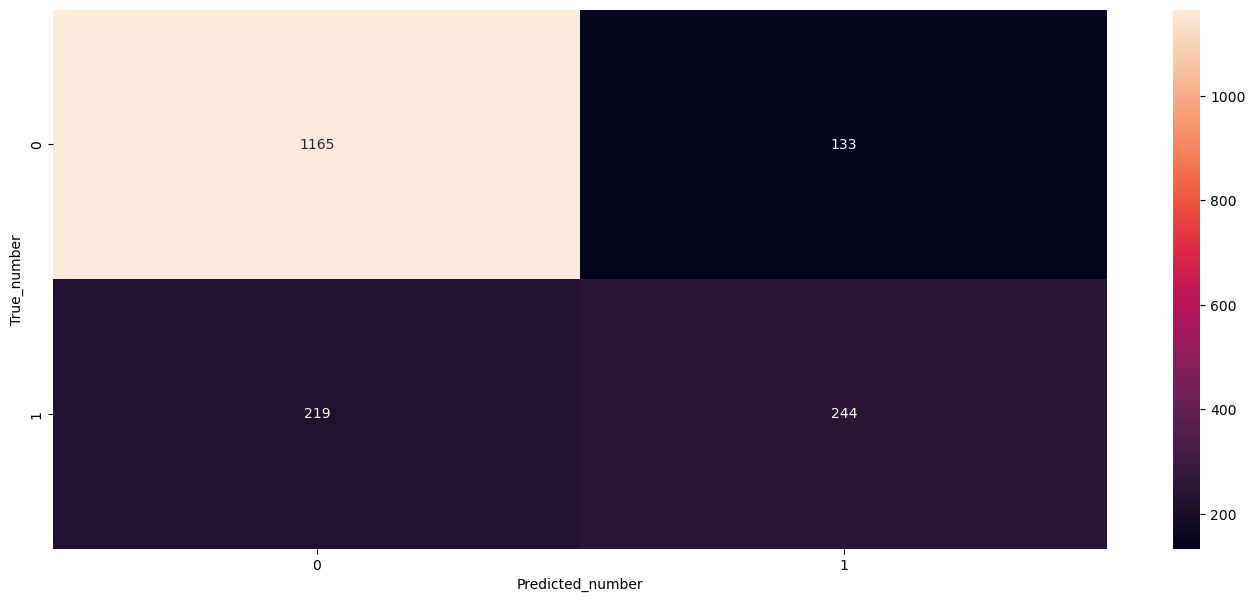

In [47]:
# ploting the confusion metrix plot
conf_mat = confusion_matrix(y_test, y_pred)
# conf_mat = df.confusion_matrix(labels=ytest,predictions=ypred_lis)
plt.figure(figsize = (17,7))
sns.heatmap(conf_mat, annot=True,fmt='d')
plt.xlabel('Predicted_number')
plt.ylabel('True_number')

## Random Forest Classifier

In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=44)

In [49]:
# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model to the resampled training data
rf_classifier.fit(x_train, y_train)

# Make predictions on the test data
y_pred = rf_classifier.predict(x_test)

In [50]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.89      0.86      1298
           1       0.60      0.45      0.51       463

    accuracy                           0.78      1761
   macro avg       0.71      0.67      0.68      1761
weighted avg       0.76      0.78      0.77      1761



Text(183.22222222222223, 0.5, 'True_number')

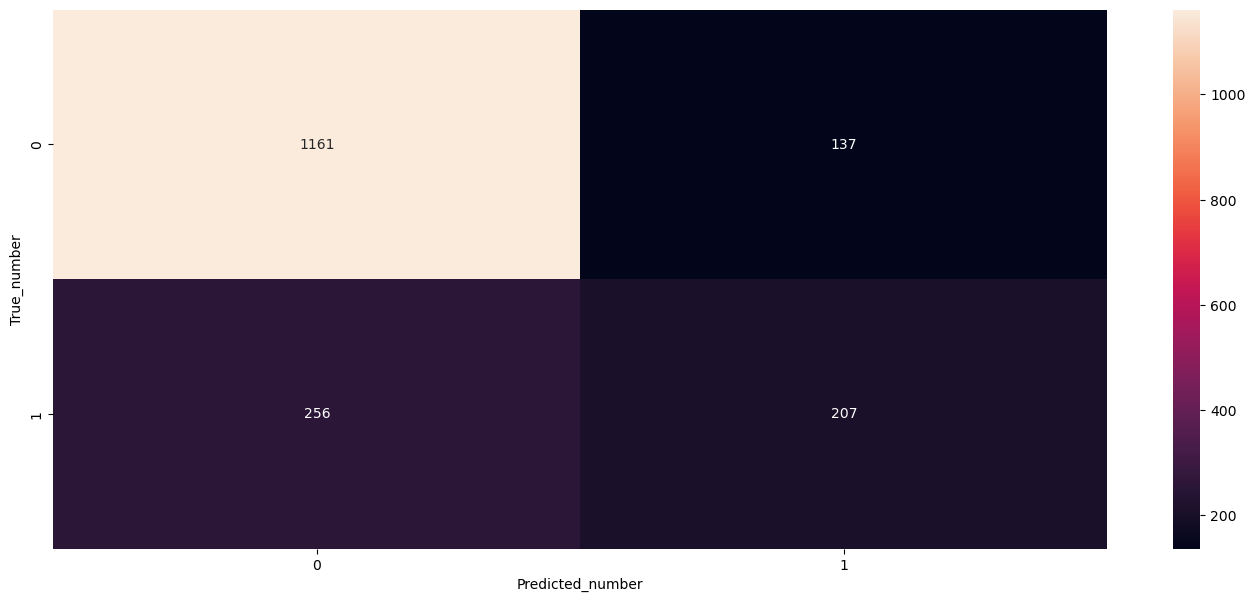

In [51]:
# ploting the confusion metrix plot
conf_mat = confusion_matrix(y_test, y_pred)
# conf_mat = df.confusion_matrix(labels=ytest,predictions=ypred_lis)
plt.figure(figsize = (17,7))
sns.heatmap(conf_mat, annot=True,fmt='d')
plt.xlabel('Predicted_number')
plt.ylabel('True_number')

## SVM 

In [52]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report

In [53]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=44)
# Create an SVM classifier
svm_classifier = SVC(kernel='linear', C=1, random_state=42)

# Fit the SVM model to the training data
svm_classifier.fit(x_train, y_train)

SVC(C=1, kernel='linear', random_state=42)

In [54]:
# Make predictions on the test data
y_pred_svm = svm_classifier.predict(x_test)

# Generate a classification report for the SVM model
svm_classification_report = classification_report(y_test, y_pred_svm)

In [55]:
# Print the classification report for the SVM model
print("SVM Classifier Classification Report:")
print(svm_classification_report)

SVM Classifier Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1298
           1       0.65      0.55      0.59       463

    accuracy                           0.80      1761
   macro avg       0.75      0.72      0.73      1761
weighted avg       0.80      0.80      0.80      1761



Text(183.22222222222223, 0.5, 'True_number')

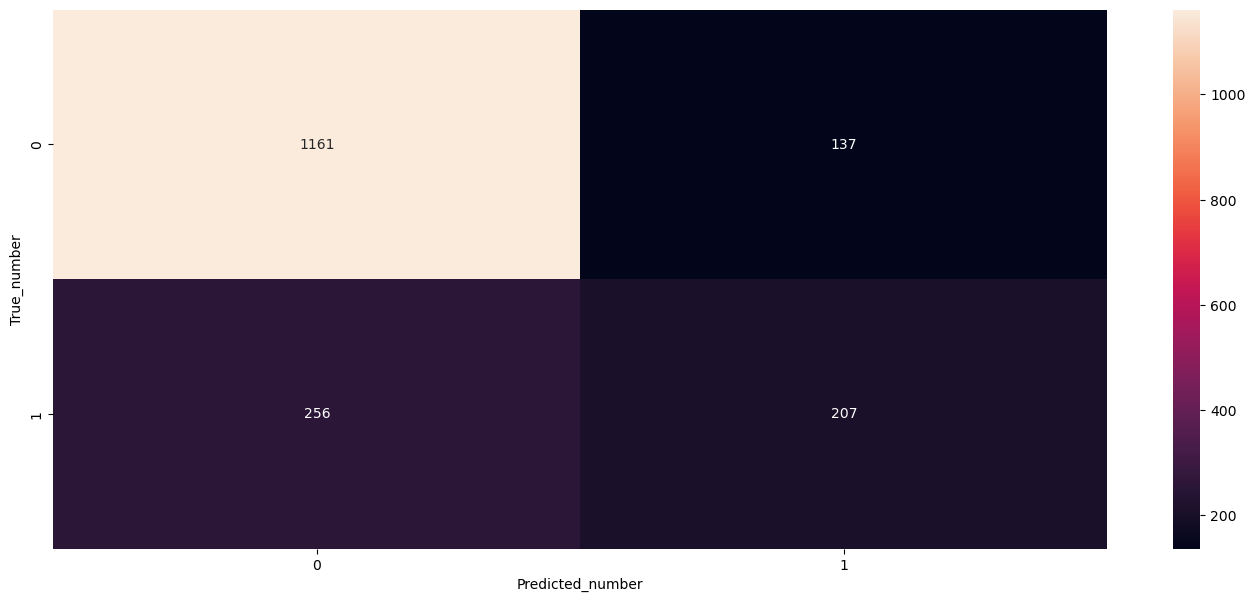

In [56]:
# ploting the confusion metrix plot
conf_mat = confusion_matrix(y_test, y_pred)
# conf_mat = df.confusion_matrix(labels=ytest,predictions=ypred_lis)
plt.figure(figsize = (17,7))
sns.heatmap(conf_mat, annot=True,fmt='d')
plt.xlabel('Predicted_number')
plt.ylabel('True_number')